In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; #sns.set()
import os

import geopandas as gpd
import pysal as ps

import plotly.express as px


pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

# import pandas_profiling
# df.profile_report(style={'full_width':True})

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [18]:
data_dir = '../../../data/'

data_covid_dir = '../../data/'

df_agro = pd.read_csv(data_dir + 'exportacao/exportacao-agronegocio-limpo.csv')

print(df_agro.columns)

df_agro

Index(['STATE', 'MUNICIPALITY', 'BEEF_EQUIVALENT_TONNES', 'BEEF_FOB_USD', 'SOY_EQUIVALENT_TONNES', 'SOY_FOB_USD', 'STATE_NORM', 'MUNICIPALITY_NORM'], dtype='object')


STATE          MUNICIPALITY  BEEF_EQUIVALENT_TONNES   BEEF_FOB_USD  SOY_EQUIVALENT_TONNES   SOY_FOB_USD STATE_NORM   MUNICIPALITY_NORM
0          "ACRE"          "ACRELANDIA"               53.223898  147319.447241                    NaN           NaN       acre          acrelandia
1          "ACRE"     "AGGREGATED ACRE"              159.397731  414084.016812                    NaN           NaN       acre     aggregated acre
2          "ACRE"        "ASSIS BRASIL"                1.866278    4929.172690                    NaN           NaN       acre        assis brasil
3          "ACRE"           "BRASILEIA"               90.780715  250927.581769                    NaN           NaN       acre           brasileia
4          "ACRE"              "BUJARI"              195.311511  536599.015444                    NaN           NaN       acre              bujari
...           ...                   ...                     ...            ...                    ...           ...        ...                 ...
3429  "SAO PAULO"           "VIRADOURO"                     NaN            NaN               4068.352  0.000000e+00  sao paulo           viradouro
3430  "TOCANTINS"          "CENTENARIO"                     NaN            NaN               8834.453  4.150179e+05  tocantins          centenario
3431  "TOCANTINS"  "LAGOA DO TOCANTINS"                     NaN            NaN               7852.848  0.000000e+00  tocantins  lagoa do tocantins
3432  "TOCANTINS"             "LIZARDA"                     NaN            NaN               4417.227  6.331097e+05  tocantins             lizarda
3433  "TOCANTINS"            "MATEIROS"                     NaN            NaN             118185.348  3.372470e+06  tocantins            mateiros

[3434 rows x 8 columns]

In [24]:
df_covid = pd.read_csv(data_covid_dir + 'total_cases_cities_normalized.csv').rename(columns={'Name':'Municipio'})

df_covid['city_ibge_code'] = df_covid['city_ibge_code'].astype(int)

df_covid

Municipio        Date  Total  TotalDeaths  city_ibge_code  Day  TotalPer100k  TotalDeathsPer100k  DayNorm  GrowthRate  GrowthRateDeaths  DaysToDouble  DaysToDoubleDeaths  WeeklyGrowth  WeeklyGrowthDeaths
0       Abadia de Goiás-GO  2019-12-31    NaN          NaN         5200050    0           NaN                 NaN      NaN         NaN               NaN           NaN                 NaN           NaN                 NaN
1       Abadia de Goiás-GO  2020-01-01    NaN          NaN         5200050    1           NaN                 NaN      NaN         NaN               NaN           NaN                 NaN           NaN                 NaN
2       Abadia de Goiás-GO  2020-01-02    NaN          NaN         5200050    2           NaN                 NaN      NaN         NaN               NaN           NaN                 NaN           NaN                 NaN
3       Abadia de Goiás-GO  2020-01-03    NaN          NaN         5200050    3           NaN                 NaN      NaN         NaN               NaN           NaN                 NaN           NaN                 NaN
4       Abadia de Goiás-GO  2020-01-04    NaN          NaN         5200050    4           NaN                 NaN      NaN         NaN               NaN           NaN                 NaN           NaN                 NaN
...                    ...         ...    ...          ...             ...  ...           ...                 ...      ...         ...               ...           ...                 ...           ...                 ...
865720             Óleo-SP  2020-06-18    NaN          NaN         3533809  170           NaN                 NaN      NaN         NaN               NaN           NaN                 NaN           NaN                 NaN
865721             Óleo-SP  2020-06-19    1.0          NaN         3533809  171     40.064103                 NaN      NaN         NaN               NaN           NaN                 NaN           NaN                 NaN
865722             Óleo-SP  2020-06-20    1.0          NaN         3533809  172     40.064103                 NaN      NaN         1.0               NaN           1.0                 NaN           NaN                 NaN
865723             Óleo-SP  2020-06-21    1.0          NaN         3533809  173     40.064103                 NaN      NaN         1.0               NaN           1.0                 NaN           NaN                 NaN
865724             Óleo-SP  2020-06-22    1.0          NaN         3533809  174     40.064103                 NaN      NaN         1.0               NaN           1.0                 NaN           NaN                 NaN

[865725 rows x 15 columns]

In [45]:
df_cod = df_covid[['city_ibge_code', 'Municipio']].drop_duplicates()

df_cod

city_ibge_code               Municipio
0              5200050      Abadia de Goiás-GO
175            3100104  Abadia dos Dourados-MG
350            5200100            Abadiânia-GO
525            1500107           Abaetetuba-PA
700            3100203               Abaeté-MG
...                ...                     ...
864850         4301552                Áurea-RS
865025         4101150               Ângulo-PR
865200         2900504        Érico Cardoso-BA
865375         1505106               Óbidos-PA
865550         3533809                 Óleo-SP

[4947 rows x 2 columns]

In [29]:
df_covid_stats = pd.read_csv(data_covid_dir + 'live_stats_cities.csv').rename(columns={'Name':'Municipio'})[['Municipio', 'variable', 'value']]

df_covid_stats

Municipio            variable   value
0          Abadia de Goiás-GO               Total    27.0
1      Abadia dos Dourados-MG               Total     5.0
2                Abadiânia-GO               Total    33.0
3               Abaetetuba-PA               Total  2209.0
4                   Abaeté-MG               Total     2.0
...                       ...                 ...     ...
49465                Áurea-RS  WeeklyGrowthDeaths     NaN
49466               Ângulo-PR  WeeklyGrowthDeaths     NaN
49467        Érico Cardoso-BA  WeeklyGrowthDeaths     NaN
49468               Óbidos-PA  WeeklyGrowthDeaths    50.0
49469                 Óleo-SP  WeeklyGrowthDeaths     NaN

[49470 rows x 3 columns]

In [30]:
df_socio_stats = pd.read_csv(data_covid_dir + 'socio_stats_cities.csv').rename(columns={'Name':'Municipio'})[['Municipio', 'variable', 'value']]

df_socio_stats

Municipio                                           variable         value
0                Ariquemes-RO                                     PIB per Capita  17566.000000
1                  Buritis-RO                                     PIB per Capita  11658.000000
2                     Jaru-RO                                     PIB per Capita  19122.000000
3                Ji-Paraná-RO                                     PIB per Capita  18143.000000
4              Monte Negro-RO                                     PIB per Capita  13193.000000
...                       ...                                                ...           ...
15295             Trindade-GO  Quantidade de Leitos - Pneumologia (por 100 mi...           NaN
15296               Uruaçu-GO  Quantidade de Leitos - Pneumologia (por 100 mi...           NaN
15297  Valparaíso de Goiás-GO  Quantidade de Leitos - Pneumologia (por 100 mi...           NaN
15298           Vianópolis-GO  Quantidade de Leitos - Pneumologia (por 100 mi...           NaN
15299             Brasília-DF  Quantidade de Leitos - Pneumologia (por 100 mi...      1.392911

[15300 rows x 3 columns]

In [73]:
df_stats = pd.concat([df_socio_stats, df_covid_stats])

df_stats = df_stats.pivot(index='Municipio', columns='variable', values='value')

df_stats = df_stats.join(df_cod.set_index('Municipio')).reset_index()

df_stats

Municipio  DaysToDouble  DaysToDoubleDeaths  Densidade Demográfica (hab/km²)  Existem Favelas (s/n)  GrowthRate  GrowthRateDeaths  PIB per Capita  Populacao (2019)  Quantidade de Leitos - Complementares  Quantidade de Leitos - Internacao  Quantidade de Leitos - Pneumologia  Quantidade de Leitos - Pneumologia (por 100 mil hab)  Quantidade de Profissionais de Saude  Quantidade de Ventiladores e Respiradores   Total  TotalDeaths  TotalDeathsPer100k  TotalPer100k  Ventiladores e Respiradores em uso  WeeklyGrowth  WeeklyGrowthDeaths  Área (km²)  city_ibge_code
0         Abadia de Goiás-GO          3.38                 NaN                              NaN                    NaN        1.23               NaN             NaN               NaN                                    NaN                                NaN                                 NaN                                                NaN                                      NaN                                        NaN    27.0          NaN                 NaN        307.76                                 NaN         50.00                 NaN         NaN         5200050
1     Abadia dos Dourados-MG          0.83                 NaN                              NaN                    NaN        0.83               NaN             NaN               NaN                                    NaN                                NaN                                 NaN                                                NaN                                      NaN                                        NaN     5.0          NaN                 NaN         71.54                                 NaN          0.00                 NaN         NaN         3100104
2               Abadiânia-GO          7.27                 NaN                              NaN                    NaN        1.10               NaN             NaN               NaN                                    NaN                                NaN                                 NaN                                                NaN                                      NaN                                        NaN    33.0          NaN                 NaN        164.65                                 NaN         65.00                 NaN         NaN         5200100
3              Abaetetuba-PA          1.00                 1.0                        97.912397                    0.0        1.00               1.0          6483.0          157698.0                                   16.0                              224.0                                 NaN                                                NaN                                   1195.0                                       10.0  2209.0         89.0               56.44       1400.78                                10.0          7.23                14.1    1610.603         1500107
4                  Abaeté-MG          1.00                 NaN                        12.788198                    NaN        1.00               NaN         13180.0           23237.0                                    NaN                               46.0                                 NaN                                                NaN                                    356.0                                        2.0     2.0          NaN                 NaN          8.61                                 2.0        100.00                 NaN    1817.066         3100203
...                      ...           ...                 ...                              ...                    ...         ...               ...             ...               ...                                    ...                                ...                                 ...                                                ...                                      ...                                        ...     ...          ...                 ...           ...                                 ...           ... 

In [74]:
df_ibge = pd.read_csv(data_dir + 'IBGE-municipios/ambiente-limpo.csv')

print(df_ibge.columns)

df_ibge = df_ibge[['CodMun', 'NM_UF_NORM', 'NM_MUN_2018_NORM', 'REGIAO', 'POP EST']]

df_ibge

Index(['CodMun', 'Condições climáticas extremas (secas, enxurradas)', 'Poluição do ar', 'Poluição de algum corpo d’água', 'Assoreamento de algum corpo d’água', 'Diminuição de vazão de algum corpo d’água', 'Desmatamentos', 'Queimadas', 'Contaminação do solo (por agrotóxicos, fertilizantes)', 'Perda de solos por erosão e/ou desertificação (voçorocas, arenização)', 'Degradação de áreas legalmente protegidas', 'Diminuição da biodiversidade (fauna e flora)', 'Existência de moradia em situação de risco ambiental', 'Falta de saneamento (destinação inadequada do esgoto doméstico)', 'Outros', 'ID', 'CD_GCUF', 'NM_UF', 'NM_UF_SIGLA', 'CD_GCMUN', 'NM_MUN_2018', 'AR_MUN_2018', 'REGIAO', 'COD UF', 'UF', 'NOME MUNIC', 'POP EST', 'CLASSE POP', 'NM_UF_NORM', 'NM_MUN_2018_NORM'], dtype='object')


CodMun        NM_UF_NORM      NM_MUN_2018_NORM            REGIAO    POP EST
0     1100015          rondonia  alta floresta doeste         1 - Norte    25437.0
1     1100023          rondonia             ariquemes         1 - Norte   107345.0
2     1100031          rondonia                cabixi         1 - Norte     6224.0
3     1100049          rondonia                cacoal         1 - Norte    88507.0
4     1100056          rondonia            cerejeiras         1 - Norte    17934.0
...       ...               ...                   ...               ...        ...
5565  5222005             goias            vianopolis  5 - Centro-Oeste    13675.0
5566  5222054             goias        vicentinopolis  5 - Centro-Oeste     8397.0
5567  5222203             goias              vila boa  5 - Centro-Oeste     5731.0
5568  5222302             goias         vila propicio  5 - Centro-Oeste     5690.0
5569  5300108  distrito federal              brasilia  5 - Centro-Oeste  3039444.0

[5570 rows x 5 columns]

In [75]:
df_merged = pd.merge(df_ibge, df_agro, left_on=['NM_UF_NORM', 'NM_MUN_2018_NORM'], 
                     right_on=['STATE_NORM', 'MUNICIPALITY_NORM'],
                    how='left')

df_merged

CodMun        NM_UF_NORM      NM_MUN_2018_NORM            REGIAO    POP EST               STATE             MUNICIPALITY  BEEF_EQUIVALENT_TONNES  BEEF_FOB_USD  SOY_EQUIVALENT_TONNES   SOY_FOB_USD        STATE_NORM     MUNICIPALITY_NORM
0     1100015          rondonia  alta floresta doeste         1 - Norte    25437.0          "RONDONIA"  "ALTA FLORESTA D'OESTE"             6602.223948  1.718931e+07            1184.154000  1.387360e+05          rondonia  alta floresta doeste
1     1100023          rondonia             ariquemes         1 - Norte   107345.0          "RONDONIA"              "ARIQUEMES"             9132.326912  2.377232e+07            9612.699000  2.558014e+06          rondonia             ariquemes
2     1100031          rondonia                cabixi         1 - Norte     6224.0          "RONDONIA"                 "CABIXI"             2253.310650  5.862369e+06           61681.266000  1.959110e+06          rondonia                cabixi
3     1100049          rondonia                cacoal         1 - Norte    88507.0          "RONDONIA"                 "CACOAL"             7557.449056  1.967297e+07            1499.929000  1.757323e+05          rondonia                cacoal
4     1100056          rondonia            cerejeiras         1 - Norte    17934.0          "RONDONIA"             "CEREJEIRAS"             1885.911316  4.903892e+06           85960.808000  9.647457e+06          rondonia            cerejeiras
...       ...               ...                   ...               ...        ...                 ...                      ...                     ...           ...                    ...           ...               ...                   ...
5565  5222005             goias            vianopolis  5 - Centro-Oeste    13675.0             "GOIAS"             "VIANOPOLIS"              327.490949  9.538867e+05          114480.816942  1.252040e+06             goias            vianopolis
5566  5222054             goias        vicentinopolis  5 - Centro-Oeste     8397.0             "GOIAS"         "VICENTINOPOLIS"              912.903851  2.672676e+06           70014.523000  4.045181e+06             goias        vicentinopolis
5567  5222203             goias              vila boa  5 - Centro-Oeste     5731.0             "GOIAS"               "VILA BOA"              518.918988  1.514128e+06            7293.180000  1.427854e+06             goias              vila boa
5568  5222302             goias         vila propicio  5 - Centro-Oeste     5690.0             "GOIAS"          "VILA PROPICIO"              455.689530  1.326225e+06           39825.180000  1.241098e+06             goias         vila propicio
5569  5300108  distrito federal              brasilia  5 - Centro-Oeste  3039444.0  "DISTRITO FEDERAL"               "BRASILIA"              113.135724  3.279479e+05          231593.497000  4.300663e+06  distrito federal              brasilia

[5570 rows x 13 columns]

In [76]:
df_merged.columns


Index(['CodMun', 'NM_UF_NORM', 'NM_MUN_2018_NORM', 'REGIAO', 'POP EST', 'STATE', 'MUNICIPALITY', 'BEEF_EQUIVALENT_TONNES', 'BEEF_FOB_USD', 'SOY_EQUIVALENT_TONNES', 'SOY_FOB_USD', 'STATE_NORM', 'MUNICIPALITY_NORM'], dtype='object')

In [77]:
df_merged = pd.merge(df_merged, df_stats, left_on=['CodMun'], 
                     right_on=['city_ibge_code'],
                    how='left')

df_merged

CodMun        NM_UF_NORM      NM_MUN_2018_NORM            REGIAO    POP EST               STATE             MUNICIPALITY  BEEF_EQUIVALENT_TONNES  BEEF_FOB_USD  SOY_EQUIVALENT_TONNES   SOY_FOB_USD        STATE_NORM     MUNICIPALITY_NORM                 Municipio  DaysToDouble  DaysToDoubleDeaths  Densidade Demográfica (hab/km²)  Existem Favelas (s/n)  GrowthRate  GrowthRateDeaths  PIB per Capita  Populacao (2019)  Quantidade de Leitos - Complementares  Quantidade de Leitos - Internacao  Quantidade de Leitos - Pneumologia  Quantidade de Leitos - Pneumologia (por 100 mil hab)  Quantidade de Profissionais de Saude  Quantidade de Ventiladores e Respiradores    Total  TotalDeaths  TotalDeathsPer100k  TotalPer100k  Ventiladores e Respiradores em uso  WeeklyGrowth  WeeklyGrowthDeaths  Área (km²)  city_ibge_code
0     1100015          rondonia  alta floresta doeste         1 - Norte    25437.0          "RONDONIA"  "ALTA FLORESTA D'OESTE"             6602.223948  1.718931e+07            1184.154000  1.387360e+05          rondonia  alta floresta doeste  Alta Floresta D'Oeste-RO         10.19                 NaN                              NaN                    NaN        1.07               NaN             NaN               NaN                                    NaN                                NaN                                 NaN                                                NaN                                      NaN                                        NaN     76.0          NaN                 NaN        331.23                                 NaN         85.37                 NaN         NaN       1100015.0
1     1100023          rondonia             ariquemes         1 - Norte   107345.0          "RONDONIA"              "ARIQUEMES"             9132.326912  2.377232e+07            9612.699000  2.558014e+06          rondonia             ariquemes              Ariquemes-RO         10.13                1.00                        24.367141                    0.0        1.07              1.00         17566.0          107863.0                                   36.0                              240.0                                 NaN                                                NaN                                   1319.0                                       49.0    983.0         19.0               17.61        911.34                                49.0         34.66               90.00    4426.576       1100023.0
2     1100031          rondonia                cabixi         1 - Norte     6224.0          "RONDONIA"                 "CABIXI"             2253.310650  5.862369e+06           61681.266000  1.959110e+06          rondonia                cabixi                 Cabixi-RO          1.00                 NaN                              NaN                    NaN        1.00               NaN             NaN               NaN                                    NaN                                NaN                                 NaN                                                NaN                                      NaN                                        NaN      3.0          NaN                 NaN         56.48                                 NaN          0.00                 NaN         NaN       1100031.0
3     1100049          rondonia                cacoal         1 - Norte    88507.0          "RONDONIA"                 "CACOAL"             7557.449056  1.967297e+07            1499.929000  1.757323e+05          rondonia                cacoal                 Cacoal-RO          1.00                1.00                              NaN                    NaN        1.00              1.00             NaN               NaN                                    NaN                                NaN                                 NaN                                                NaN                                      NaN                                        NaN    209.0          2.0                2.34        24

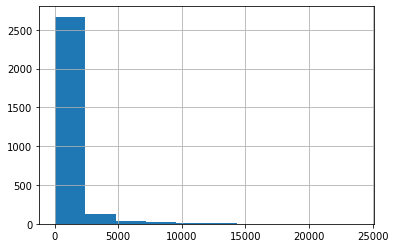

In [78]:
df_merged['BEEF_EQUIVALENT_TONNES'].hist()

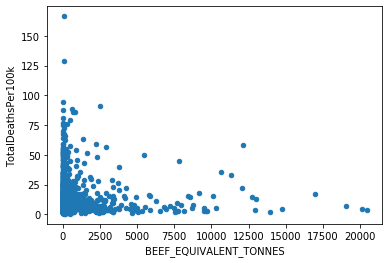

In [79]:
df_merged.plot.scatter(x='BEEF_EQUIVALENT_TONNES', y='TotalDeathsPer100k')

rondonia


BEEF_EQUIVALENT_TONNES  TotalDeathsPer100k
BEEF_EQUIVALENT_TONNES                1.000000           -0.003198
TotalDeathsPer100k                   -0.003198            1.000000

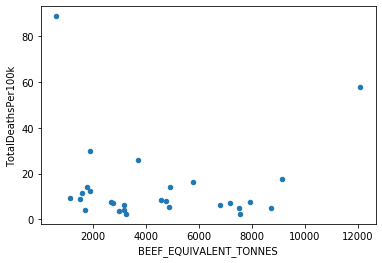

acre


BEEF_EQUIVALENT_TONNES  TotalDeathsPer100k
BEEF_EQUIVALENT_TONNES                1.000000            0.158933
TotalDeathsPer100k                    0.158933            1.000000

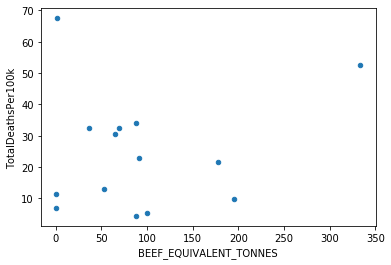

amazonas


BEEF_EQUIVALENT_TONNES  TotalDeathsPer100k
BEEF_EQUIVALENT_TONNES                     1.0                -1.0
TotalDeathsPer100k                        -1.0                 1.0

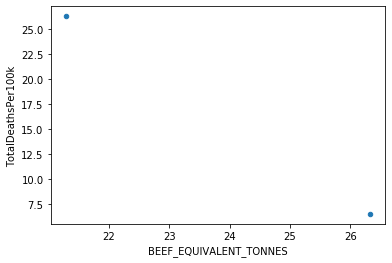

roraima


BEEF_EQUIVALENT_TONNES  TotalDeathsPer100k
BEEF_EQUIVALENT_TONNES                     NaN                 NaN
TotalDeathsPer100k                         NaN                 1.0

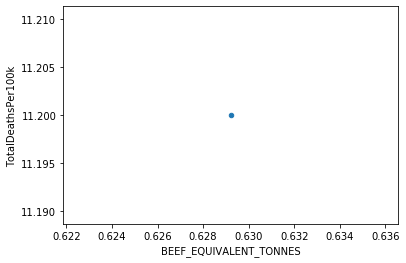

para


BEEF_EQUIVALENT_TONNES  TotalDeathsPer100k
BEEF_EQUIVALENT_TONNES                1.000000           -0.130422
TotalDeathsPer100k                   -0.130422            1.000000

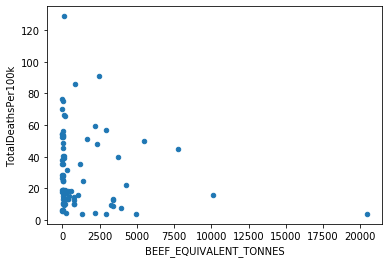

amapa


BEEF_EQUIVALENT_TONNES  TotalDeathsPer100k
BEEF_EQUIVALENT_TONNES                     NaN                 NaN
TotalDeathsPer100k                         NaN                 1.0

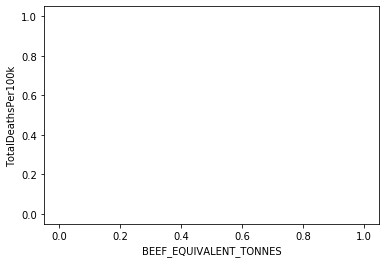

tocantins


BEEF_EQUIVALENT_TONNES  TotalDeathsPer100k
BEEF_EQUIVALENT_TONNES                1.000000           -0.177114
TotalDeathsPer100k                   -0.177114            1.000000

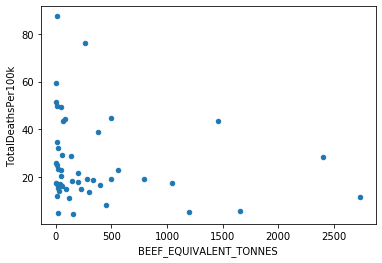

maranhao


BEEF_EQUIVALENT_TONNES  TotalDeathsPer100k
BEEF_EQUIVALENT_TONNES                1.000000            0.237369
TotalDeathsPer100k                    0.237369            1.000000

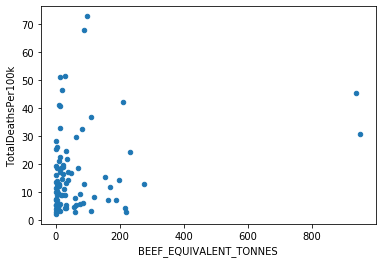

piaui


BEEF_EQUIVALENT_TONNES  TotalDeathsPer100k
BEEF_EQUIVALENT_TONNES                     1.0                 1.0
TotalDeathsPer100k                         1.0                 1.0

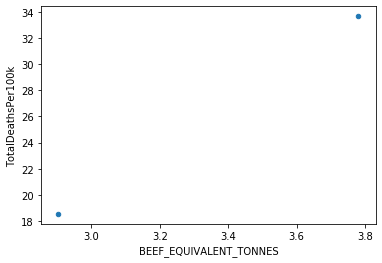

ceara


BEEF_EQUIVALENT_TONNES  TotalDeathsPer100k
BEEF_EQUIVALENT_TONNES                     NaN                 NaN
TotalDeathsPer100k                         NaN                 1.0

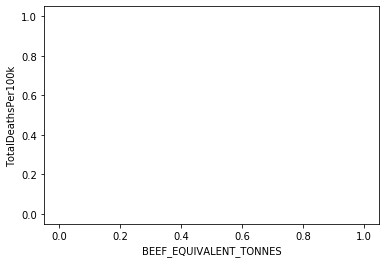

rio grande do norte


BEEF_EQUIVALENT_TONNES  TotalDeathsPer100k
BEEF_EQUIVALENT_TONNES                     NaN                 NaN
TotalDeathsPer100k                         NaN                 1.0

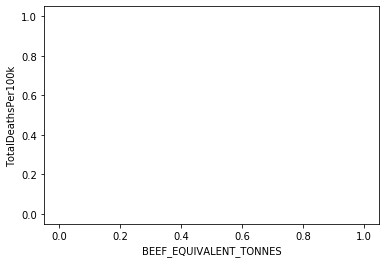

paraiba


BEEF_EQUIVALENT_TONNES  TotalDeathsPer100k
BEEF_EQUIVALENT_TONNES                     NaN                 NaN
TotalDeathsPer100k                         NaN                 1.0

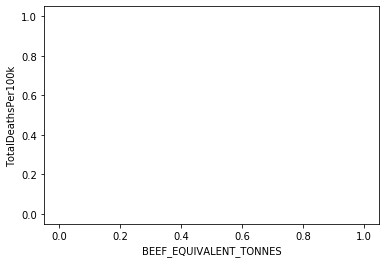

pernambuco


BEEF_EQUIVALENT_TONNES  TotalDeathsPer100k
BEEF_EQUIVALENT_TONNES                     NaN                 NaN
TotalDeathsPer100k                         NaN                 1.0

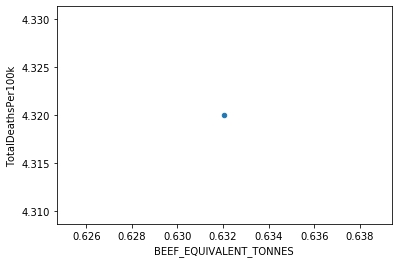

alagoas


BEEF_EQUIVALENT_TONNES  TotalDeathsPer100k
BEEF_EQUIVALENT_TONNES                     NaN                 NaN
TotalDeathsPer100k                         NaN                 1.0

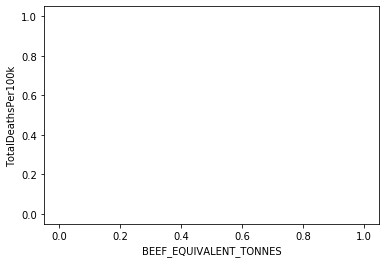

sergipe


BEEF_EQUIVALENT_TONNES  TotalDeathsPer100k
BEEF_EQUIVALENT_TONNES                     NaN                 NaN
TotalDeathsPer100k                         NaN                 1.0

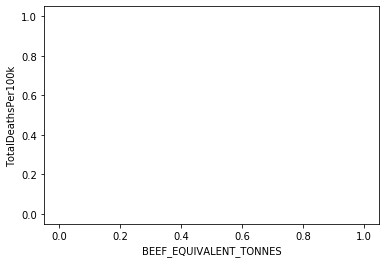

bahia


BEEF_EQUIVALENT_TONNES  TotalDeathsPer100k
BEEF_EQUIVALENT_TONNES                1.000000           -0.245781
TotalDeathsPer100k                   -0.245781            1.000000

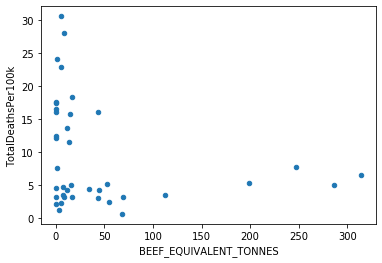

minas gerais


BEEF_EQUIVALENT_TONNES  TotalDeathsPer100k
BEEF_EQUIVALENT_TONNES                1.000000           -0.126244
TotalDeathsPer100k                   -0.126244            1.000000

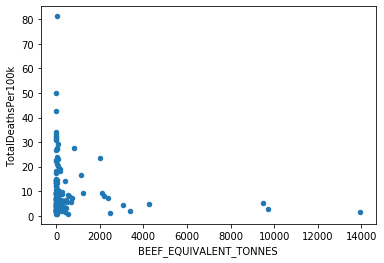

espirito santo


BEEF_EQUIVALENT_TONNES  TotalDeathsPer100k
BEEF_EQUIVALENT_TONNES                1.000000           -0.189247
TotalDeathsPer100k                   -0.189247            1.000000

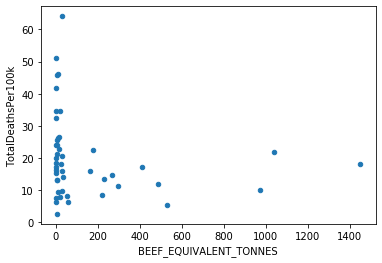

rio de janeiro


BEEF_EQUIVALENT_TONNES  TotalDeathsPer100k
BEEF_EQUIVALENT_TONNES                1.000000           -0.452506
TotalDeathsPer100k                   -0.452506            1.000000

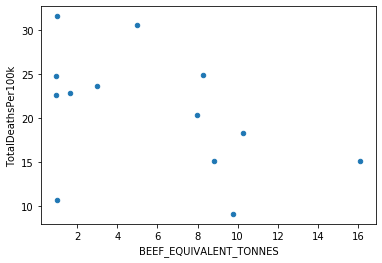

sao paulo


BEEF_EQUIVALENT_TONNES  TotalDeathsPer100k
BEEF_EQUIVALENT_TONNES                1.000000           -0.049022
TotalDeathsPer100k                   -0.049022            1.000000

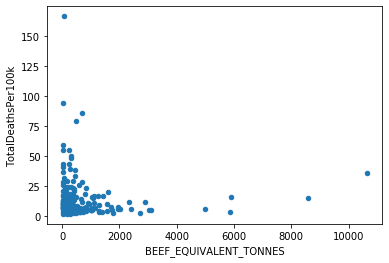

parana


BEEF_EQUIVALENT_TONNES  TotalDeathsPer100k
BEEF_EQUIVALENT_TONNES                1.000000           -0.034782
TotalDeathsPer100k                   -0.034782            1.000000

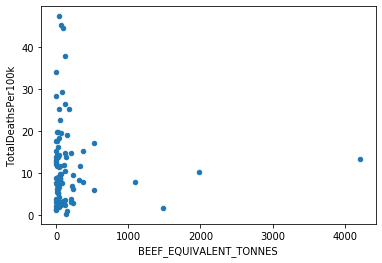

santa catarina


BEEF_EQUIVALENT_TONNES  TotalDeathsPer100k
BEEF_EQUIVALENT_TONNES                1.000000           -0.139081
TotalDeathsPer100k                   -0.139081            1.000000

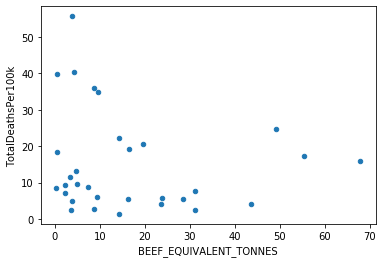

rio grande do sul


BEEF_EQUIVALENT_TONNES  TotalDeathsPer100k
BEEF_EQUIVALENT_TONNES                1.000000           -0.143325
TotalDeathsPer100k                   -0.143325            1.000000

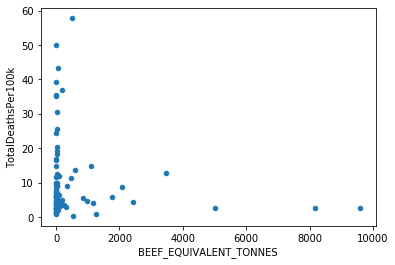

mato grosso do sul


BEEF_EQUIVALENT_TONNES  TotalDeathsPer100k
BEEF_EQUIVALENT_TONNES                1.000000           -0.074207
TotalDeathsPer100k                   -0.074207            1.000000

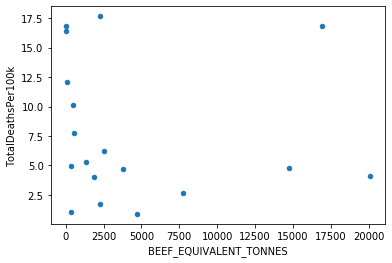

mato grosso


BEEF_EQUIVALENT_TONNES  TotalDeathsPer100k
BEEF_EQUIVALENT_TONNES                1.000000           -0.180777
TotalDeathsPer100k                   -0.180777            1.000000

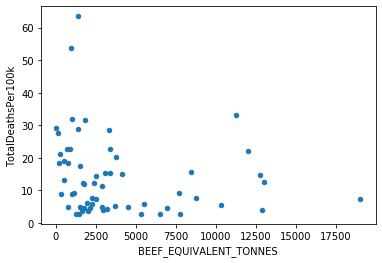

goias


BEEF_EQUIVALENT_TONNES  TotalDeathsPer100k
BEEF_EQUIVALENT_TONNES                1.000000           -0.264835
TotalDeathsPer100k                   -0.264835            1.000000

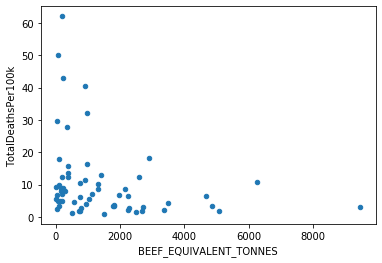

distrito federal


BEEF_EQUIVALENT_TONNES  TotalDeathsPer100k
BEEF_EQUIVALENT_TONNES                     NaN                 NaN
TotalDeathsPer100k                         NaN                 NaN

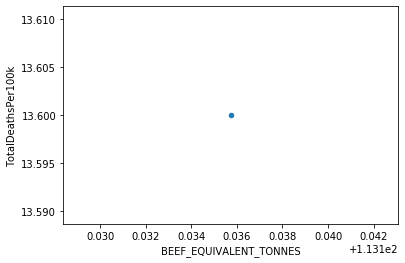

In [80]:
states = df_merged['NM_UF_NORM'].unique()

for s in states:
    print(s)
    df = df_merged.query("NM_UF_NORM == @s")
    df.plot.scatter(x='BEEF_EQUIVALENT_TONNES', y='TotalDeathsPer100k')
    display(df[['BEEF_EQUIVALENT_TONNES', 'TotalDeathsPer100k']].corr())
    plt.show()

In [95]:


fig = px.scatter(df_merged, x="BEEF_EQUIVALENT_TONNES", y="TotalDeathsPer100k", 
           size="POP EST", color="REGIAO", hover_name="Municipio",
                 title='Índice de mortes X Exportação de carne', size_max=55) #, range_x=[100,100000], range_y=[25,90]

fig.update_traces(marker=dict(sizemin=3))

fig.write_html("scatter-beef-deaths.html")

fig.show()

In [64]:
df_merged.corr()

CodMun   POP EST  BEEF_EQUIVALENT_TONNES  BEEF_FOB_USD  SOY_EQUIVALENT_TONNES  SOY_FOB_USD  DaysToDouble  DaysToDoubleDeaths  Densidade Demográfica (hab/km²)  Existem Favelas (s/n)  GrowthRate  GrowthRateDeaths  PIB per Capita  Populacao (2019)  Quantidade de Leitos - Complementares  Quantidade de Leitos - Internacao  Quantidade de Leitos - Pneumologia  Quantidade de Leitos - Pneumologia (por 100 mil hab)  Quantidade de Profissionais de Saude  Quantidade de Ventiladores e Respiradores     Total  TotalDeaths  TotalDeathsPer100k  TotalPer100k  Ventiladores e Respiradores em uso  WeeklyGrowth  WeeklyGrowthDeaths  Área (km²)  city_ibge_code
CodMun                                              1.000000 -0.002698                0.097306      0.113070               0.162265     0.084121     -0.010697            0.025044                         0.033481              -0.148291    0.054265          0.066715        0.253973          0.010456                               0.008687                           0.031524                           -0.084905                                           0.059727                                 0.019279                                   0.016451 -0.041634    -0.015801           -0.292571     -0.346182                            0.017722      0.102368            0.065420   -0.205390        1.000000
POP EST                                            -0.002698  1.000000                0.054025      0.052046               0.073125     0.047103      0.135727            0.557255                         0.409483               0.176941   -0.006005          0.004838        0.095594          0.999902                               0.980823                           0.966593                            0.790447                                          -0.111975                                 0.985877                                   0.981534  0.948712     0.898014            0.108780      0.056163                            0.982385     -0.023789            0.021115    0.000853        0.005081
BEEF_EQUIVALENT_TONNES                              0.097306  0.054025                1.000000      0.995938               0.154738     0.156637      0.040498            0.048581                        -0.122768              -0.005595    0.002775          0.068133        0.046702          0.026466                              -0.013359                          -0.001462                           -0.068096                                          -0.095149                                 0.022522                                   0.005386  0.043186     0.041369           -0.077831      0.002348                            0.004098      0.019230            0.095729    0.262494        0.094357
BEEF_FOB_USD                                        0.113070  0.052046                0.995938      1.000000               0.161331     0.165351      0.043145            0.049373                        -0.120978              -0.007759    0.004306          0.073382        0.048797          0.025883                              -0.010446                          -0.002075                           -0.069196                                          -0.097828                                 0.022939                                   0.006996  0.040332     0.036851           -0.079720     -0.002432                            0.005873      0.022670            0.103742    0.256214        0.111197
SOY_EQUIVALENT_TONNES                               0.162265  0.073125                0.154738      0.161331               1.000000     0.831107      0.016356            0.034104                        -0.130037              -0.033653   -0.005007          0.076187        0.237268          0.056114                               0.011447                           0.009954                           -0.076146                                          -0.135830                                 0.045199                                   0.025041  0.054492     0

In [12]:
import geopandas as gpd
import pysal as ps

shp_dir = data_dir + '/IBGE-municipios/shapefiles-br_municipios/'

dfm = gpd.read_file(shp_dir + 'BRMUE250GC_SIR.shp')

dfm['CD_GEOCMU'] = dfm['CD_GEOCMU'].astype(int)

dfm

NM_MUNICIP  CD_GEOCMU                                           geometry
0                          CAIUÁ    3509106  POLYGON ((-51.86001 -21.58072, -51.85892 -21.5...
1                       CASTILHO    3511003  POLYGON ((-51.41936 -20.68108, -51.41942 -20.6...
2                        DRACENA    3514403  POLYGON ((-51.48515 -21.42765, -51.48500 -21.4...
3               ESTRELA DO NORTE    3515301  POLYGON ((-51.57097 -22.39887, -51.57099 -22.3...
4     EUCLIDES DA CUNHA PAULISTA    3515350  POLYGON ((-52.44569 -22.60828, -52.44569 -22.6...
...                          ...        ...                                                ...
5567               TEIXEIRÓPOLIS    1101559  POLYGON ((-62.12258 -10.89939, -62.12418 -10.9...
5568                   THEOBROMA    1101609  POLYGON ((-61.95442 -9.94968, -61.95552 -9.950...
5569                       URUPÁ    1101708  POLYGON ((-62.15601 -11.02598, -62.15500 -11.0...
5570               VALE DO ANARI    1101757  POLYGON ((-61.57464 -9.71779, -61.58190 -9.711...
5571             VALE DO PARAÍSO    1101807  POLYGON ((-61.97267 -10.06753, -61.97104 -10.0...

[5572 rows x 3 columns]

In [13]:
df_geo_merged = dfm.merge(df_merged, left_on='CD_GEOCMU', right_on='CodMun')

df_geo_merged.head()

NM_MUNICIP  CD_GEOCMU                                           geometry   CodMun  Condições climáticas extremas (secas, enxurradas)  Poluição do ar  Poluição de algum corpo d’água  Assoreamento de algum corpo d’água  Diminuição de vazão de algum corpo d’água  Desmatamentos  Queimadas  Contaminação do solo (por agrotóxicos, fertilizantes)  Perda de solos por erosão e/ou desertificação (voçorocas, arenização)  Degradação de áreas legalmente protegidas  Diminuição da biodiversidade (fauna e flora)  Existência de moradia em situação de risco ambiental  Falta de saneamento (destinação inadequada do esgoto doméstico)  Outros      ID  CD_GCUF      NM_UF NM_UF_SIGLA   CD_GCMUN                 NM_MUN_2018  AR_MUN_2018       REGIAO  COD UF  UF                  NOME MUNIC  POP EST           CLASSE POP NM_UF_NORM            NM_MUN_2018_NORM        STATE                  MUNICIPALITY  BEEF_EQUIVALENT_TONNES  BEEF_FOB_USD  SOY_EQUIVALENT_TONNES   SOY_FOB_USD STATE_NORM  \
0                       CAIUÁ    3509106  POLYGON ((-51.86001 -21.58072, -51.85892 -21.5...  3509106                                                NaN             NaN                             NaN                                 NaN                                        NaN            NaN        NaN                                                NaN                                                    NaN                                                            NaN                                           NaN                                                NaN                                                   NaN                   NaN  3375.0     35.0  São Paulo          SP  3509106.0                       CAIUÁ      551.159  3 - Sudeste    35.0  SP                       Caiuá   5695.0   2 - 5001 até 10000  sao paulo                       caiua  "SAO PAULO"                       "CAIUA"              864.044855  2.521550e+06             882.889000   7781.523553  sao paulo   
1                    CASTILHO    3511003  POLYGON ((-51.41936 -20.68108, -51.41942 -20.6...  3511003                                                NaN             NaN                             NaN                                 NaN                                        NaN            NaN        NaN                                                NaN                                                    NaN                                                            NaN                                           NaN                                                NaN                                                   NaN                   NaN  3398.0     35.0  São Paulo          SP  3511003.0                    CASTILHO     1065.318  3 - Sudeste    35.0  SP                    Castilho  20362.0  4 - 20001 até 50000  sao paulo                    castilho  "SAO PAULO"                    "CASTILHO"             1021.235947  2.981579e+06            2542.719998  43936.948358  sao paulo   
2                     DRACENA    3514403  POLYGON ((-51.48515 -21.42765, -51.48500 -21.4...  3514403                                                NaN             NaN                             NaN                                 NaN                                        NaN            NaN        NaN                                                NaN                                                    NaN                                                            NaN                                           NaN                                                NaN                                                   NaN                   NaN  3427.0     35.0  São Paulo          SP  3514403.0                     DRACENA      487.688  3 - Sudeste    35.0  SP                     Dracena  46324.0  4 - 20001 até 50000  sao paulo                     dracena  "SAO PAULO"                     "DRACENA"               76.318278  2.309337e+05                    NaN           NaN  sao paulo   
3            ESTRELA DO NORTE    3515301  POLYG

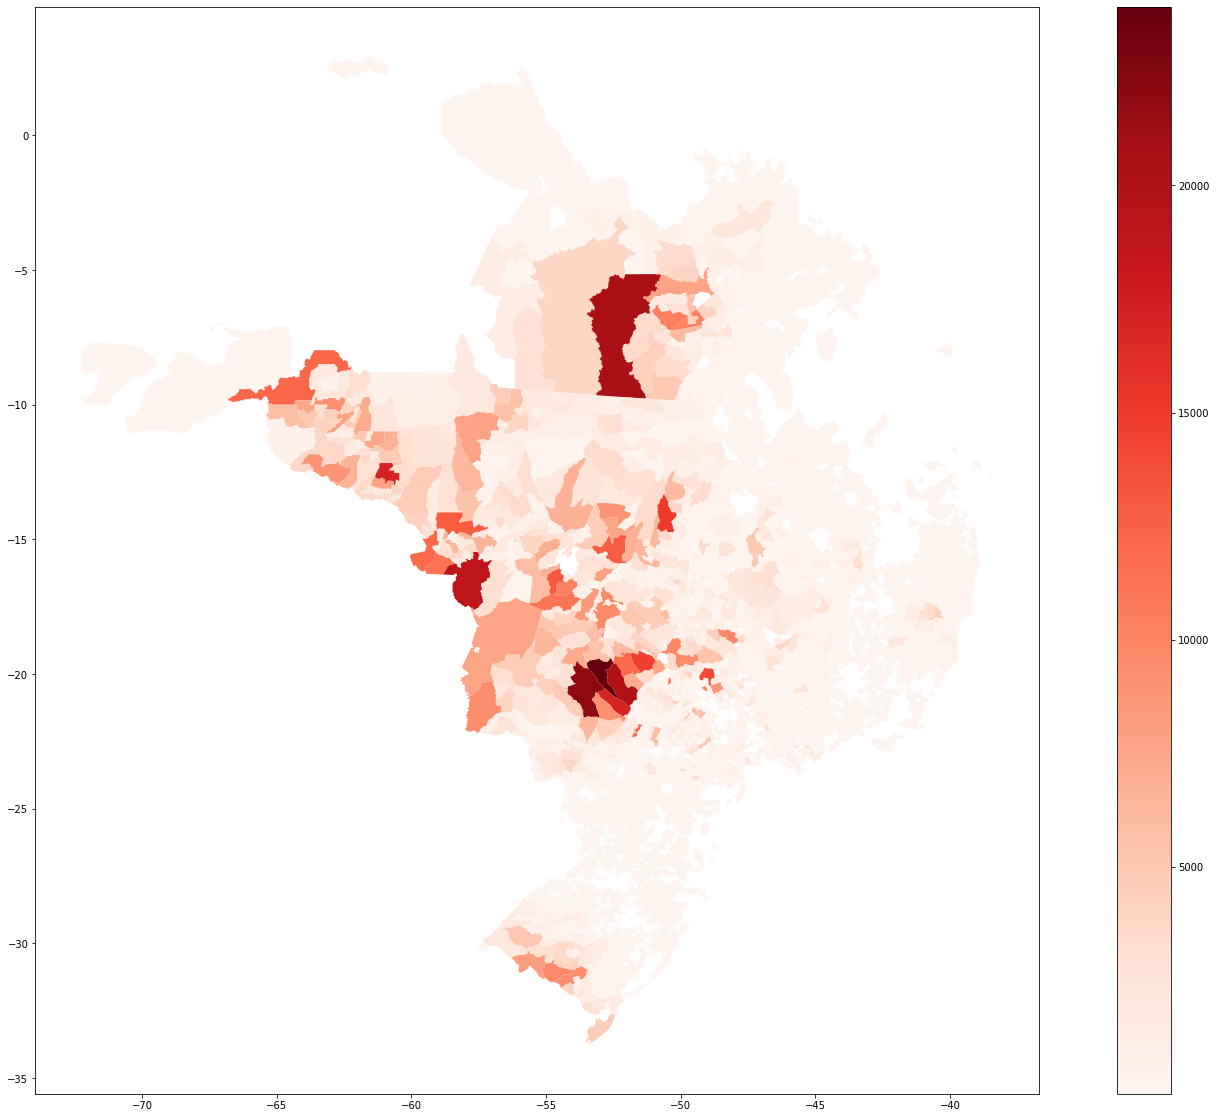

In [14]:
df_geo_merged.plot(column=variable, cmap = 'Reds', figsize=(28, 20), legend=True)

Não Respondeu  Sem Ocorrência  Com Ocorrência
variable                                                                                         
Condições climáticas extremas (secas, enxurradas)      372.225225      457.700499      192.780102
Diminuição da biodiversidade (fauna e flora)           372.225225      345.793590      208.137661
Diminuição de vazão de algum corpo d’água              372.225225      373.738371      245.273801
Falta de saneamento (destinação inadequada do e...     372.225225      361.184075      292.122358
Desmatamentos                                          372.225225      345.079464      310.965973
Existência de moradia em situação de risco ambi...     372.225225      333.901329      352.071457
Poluição de algum corpo d’água                         372.225225      319.888792      391.810527
Degradação de áreas legalmente protegidas              372.225225      330.959692      411.060764
Contaminação do solo (por agrotóxicos, fertiliz...     372.225225      329.747005      439.340818
Perda de solos por erosão e/ou desertificação (...     372.225225      321.605907      446.282705
Queimadas                                              372.225225      278.349968      453.254924
Poluição do ar                                         372.225225      327.866336      459.570647
Assoreamento de algum corpo d’água                     372.225225      283.813562      527.326275

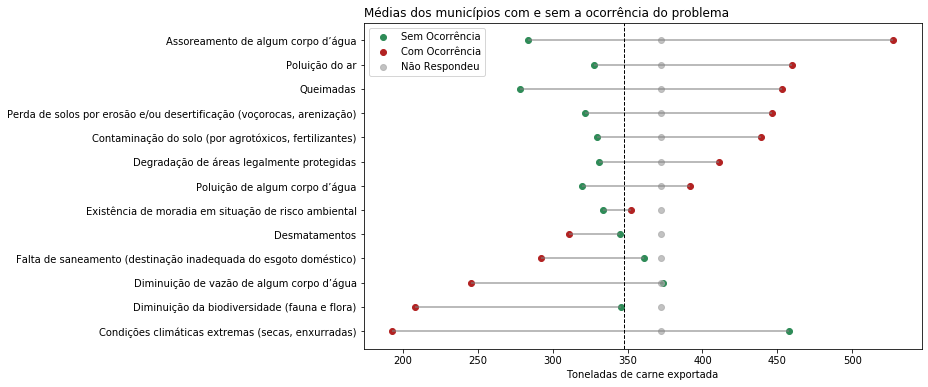

Não Respondeu  Sem Ocorrência  Com Ocorrência
variable                                                                                         
Condições climáticas extremas (secas, enxurradas)    1.047559e+06    1.262585e+06    5.306327e+05
Diminuição da biodiversidade (fauna e flora)         1.047559e+06    9.525496e+05    5.840833e+05
Diminuição de vazão de algum corpo d’água            1.047559e+06    1.018288e+06    7.052522e+05
Falta de saneamento (destinação inadequada do e...   1.047559e+06    1.010794e+06    7.792272e+05
Desmatamentos                                        1.047559e+06    9.535975e+05    8.511947e+05
Existência de moradia em situação de risco ambi...   1.047559e+06    9.225766e+05    9.549335e+05
Poluição de algum corpo d’água                       1.047559e+06    8.857542e+05    1.066893e+06
Degradação de áreas legalmente protegidas            1.047559e+06    9.138344e+05    1.112420e+06
Contaminação do solo (por agrotóxicos, fertiliz...   1.047559e+06    9.098952e+05    1.198008e+06
Poluição do ar                                       1.047559e+06    9.047353e+05    1.254479e+06
Perda de solos por erosão e/ou desertificação (...   1.047559e+06    8.834230e+05    1.255173e+06
Queimadas                                            1.047559e+06    7.590776e+05    1.266537e+06
Assoreamento de algum corpo d’água                   1.047559e+06    7.781743e+05    1.469540e+06

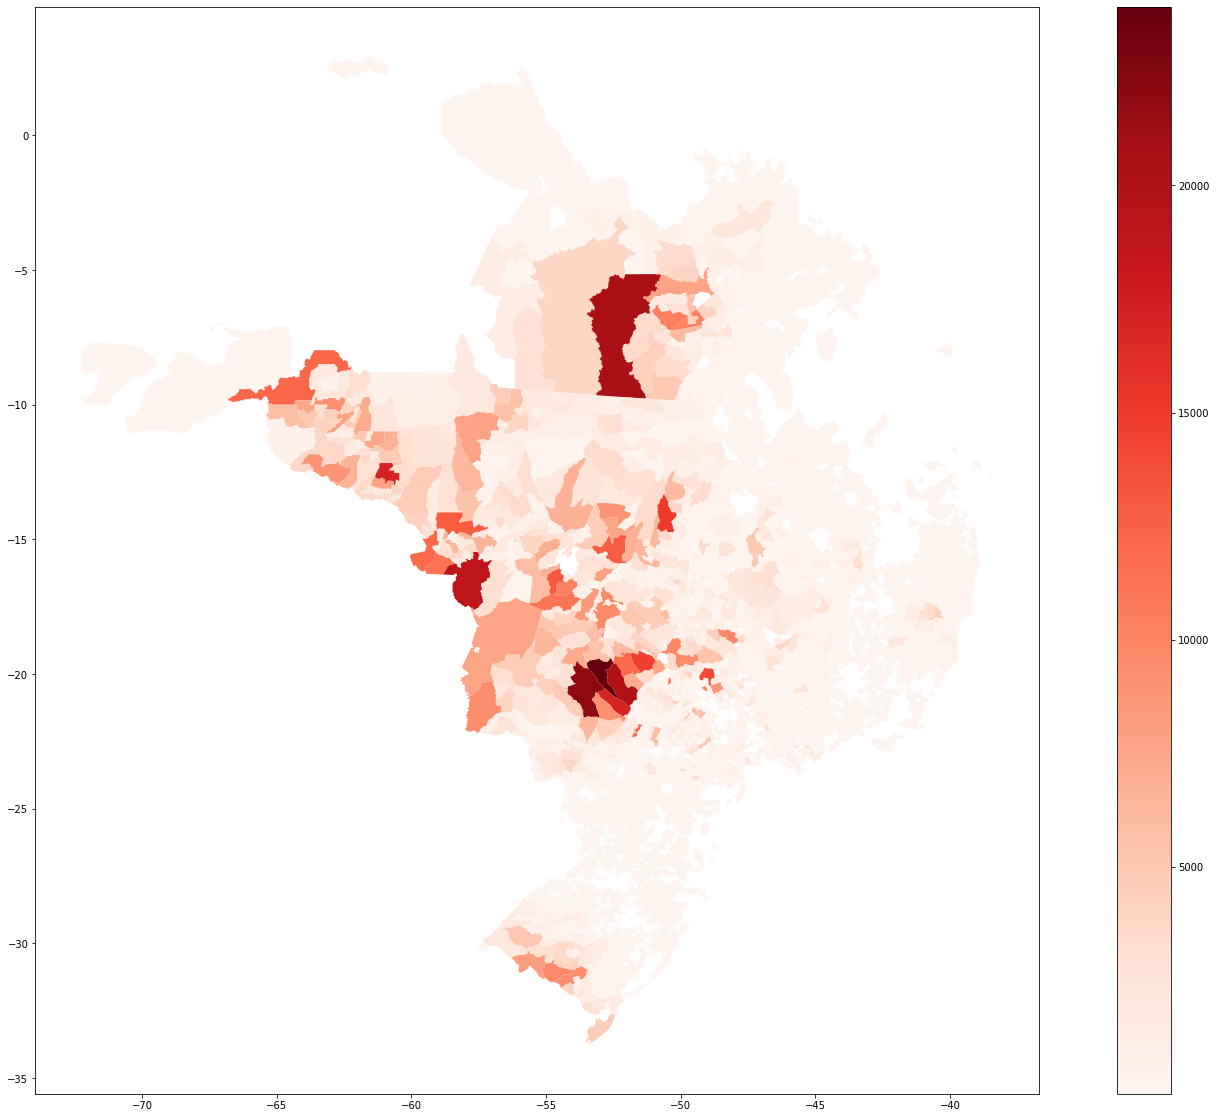

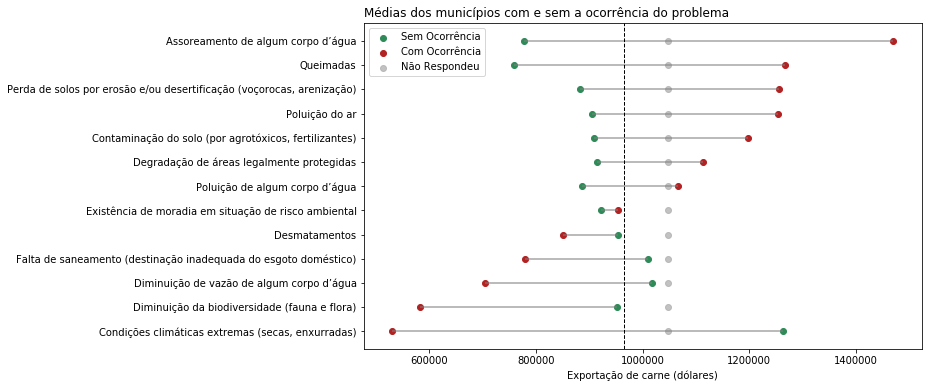

Não Respondeu  Sem Ocorrência  Com Ocorrência
variable                                                                                         
Diminuição de vazão de algum corpo d’água            17340.347996    21940.550927     9217.604752
Condições climáticas extremas (secas, enxurradas)    17340.347996    22938.396418    12627.202980
Diminuição da biodiversidade (fauna e flora)         17340.347996    18527.271396    13947.682246
Falta de saneamento (destinação inadequada do e...   17340.347996    19287.304571    16310.235556
Degradação de áreas legalmente protegidas            17340.347996    18274.316331    17098.520481
Poluição de algum corpo d’água                       17340.347996    18429.413470    17406.815187
Assoreamento de algum corpo d’água                   17340.347996    17108.647807    22206.560557
Queimadas                                            17340.347996    15728.455621    23231.994987
Desmatamentos                                        17340.347996    16164.414926    23795.367518
Contaminação do solo (por agrotóxicos, fertiliz...   17340.347996    17744.417549    25771.158106
Existência de moradia em situação de risco ambi...   17340.347996    17165.880171    26226.290304
Perda de solos por erosão e/ou desertificação (...   17340.347996    16810.124502    28874.255866
Poluição do ar                                       17340.347996    17392.738732    30513.061238

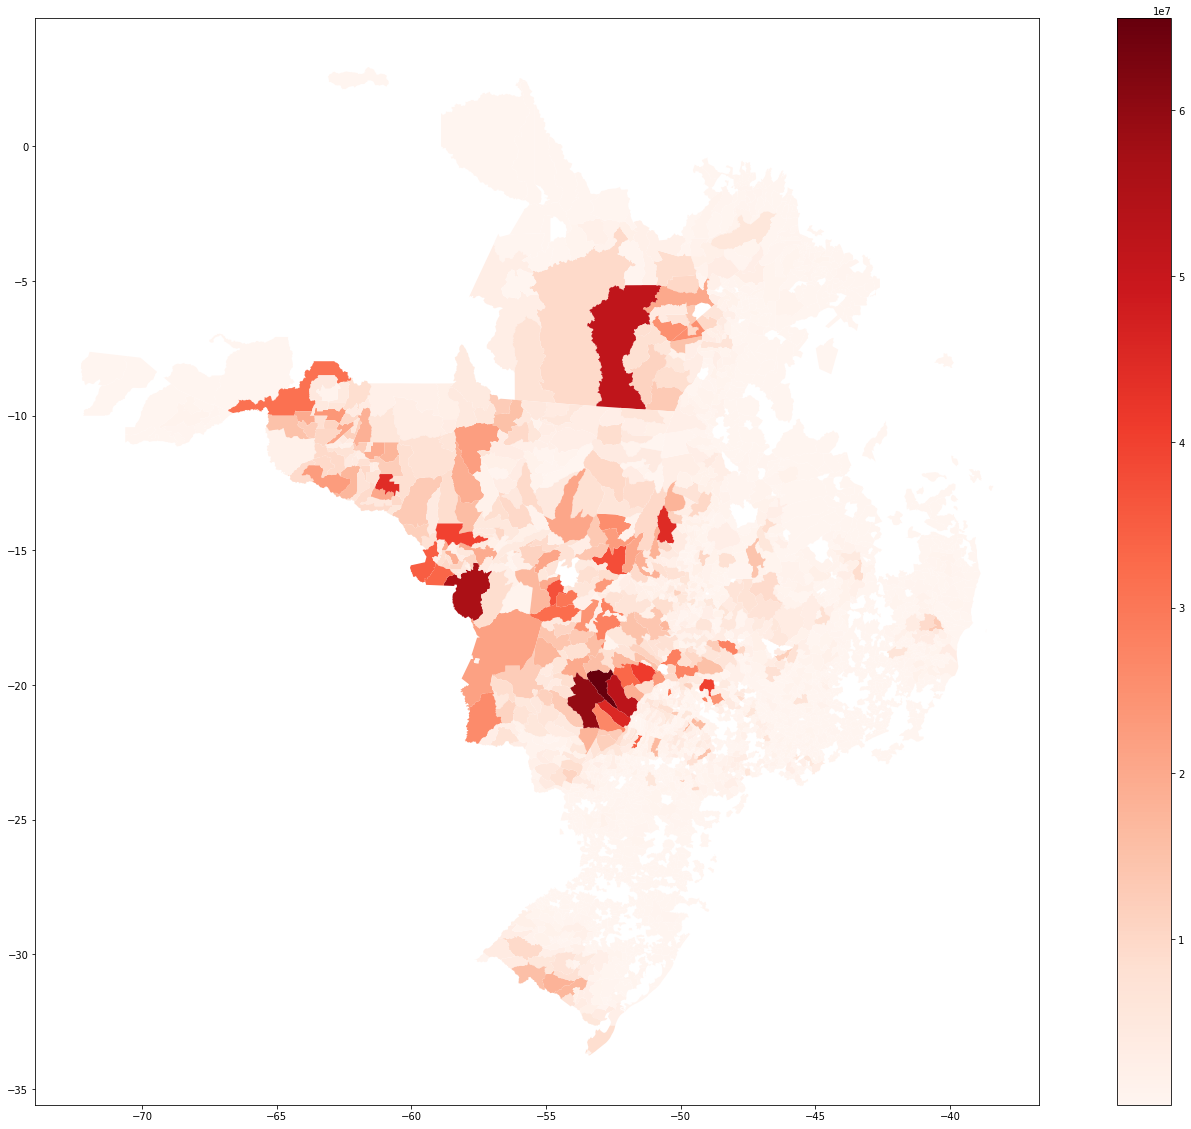

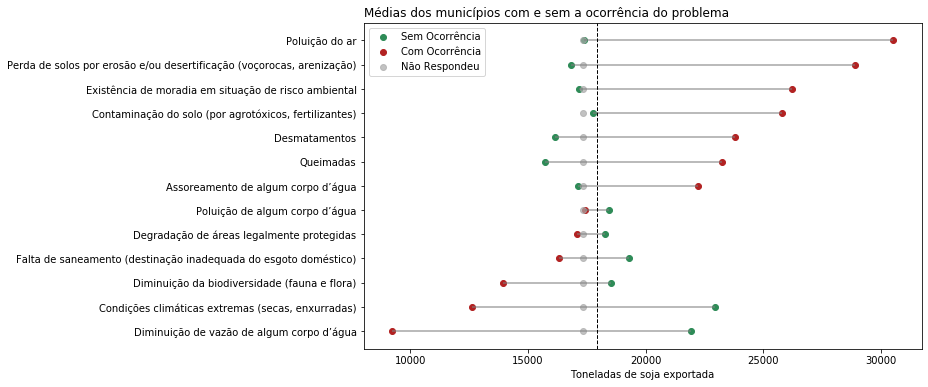

Não Respondeu  Sem Ocorrência  Com Ocorrência
variable                                                                                         
Diminuição de vazão de algum corpo d’água           684018.006873    9.909293e+05    4.296647e+05
Condições climáticas extremas (secas, enxurradas)   684018.006873    1.052508e+06    5.594197e+05
Degradação de áreas legalmente protegidas           684018.006873    8.365462e+05    6.673168e+05
Falta de saneamento (destinação inadequada do e...  684018.006873    8.896853e+05    7.150601e+05
Diminuição da biodiversidade (fauna e flora)        684018.006873    8.340890e+05    7.199221e+05
Poluição de algum corpo d’água                      684018.006873    8.558808e+05    7.220593e+05
Existência de moradia em situação de risco ambi...  684018.006873    8.141836e+05    9.171814e+05
Contaminação do solo (por agrotóxicos, fertiliz...  684018.006873    8.169023e+05    9.760240e+05
Assoreamento de algum corpo d’água                  684018.006873    7.734341e+05    1.018581e+06
Perda de solos por erosão e/ou desertificação (...  684018.006873    7.841542e+05    1.146741e+06
Desmatamentos                                       684018.006873    6.812450e+05    1.223521e+06
Queimadas                                           684018.006873    6.047668e+05    1.276081e+06
Poluição do ar                                      684018.006873    7.683458e+05    1.703752e+06

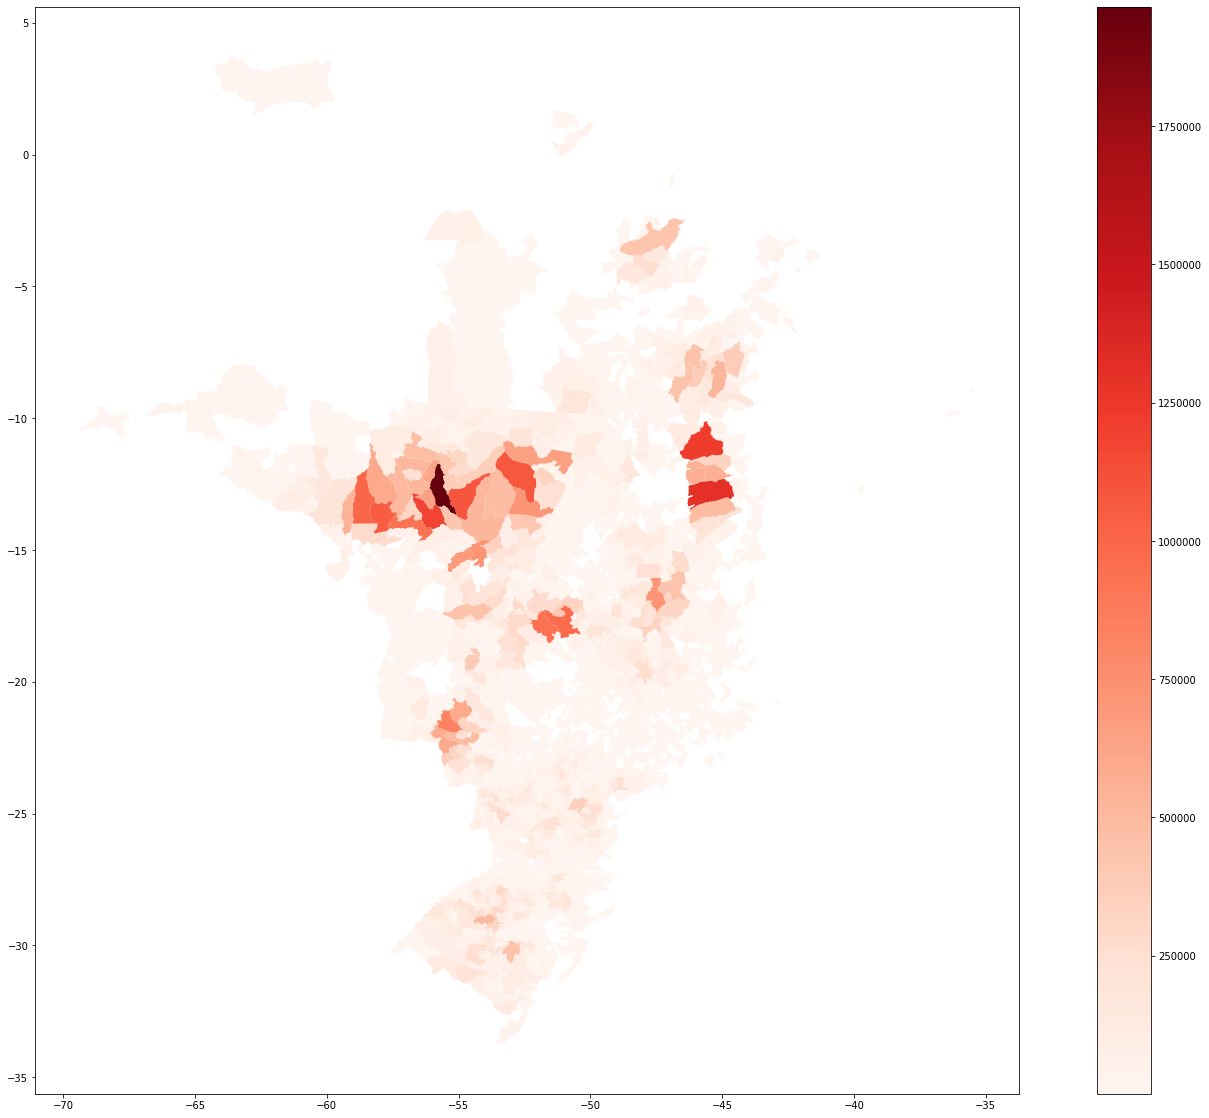

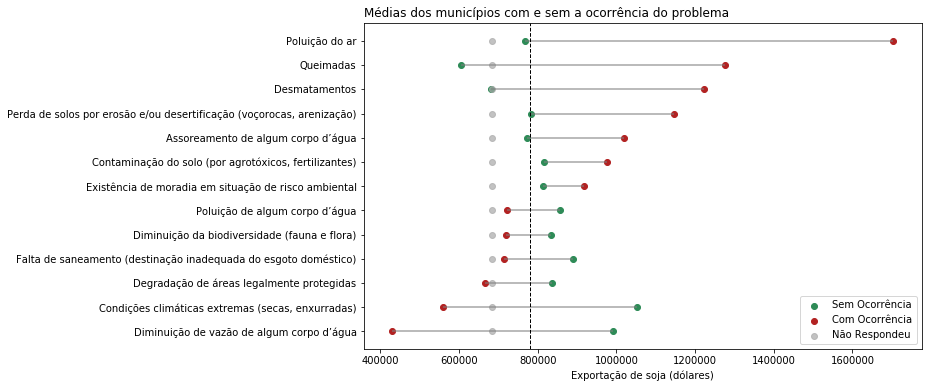

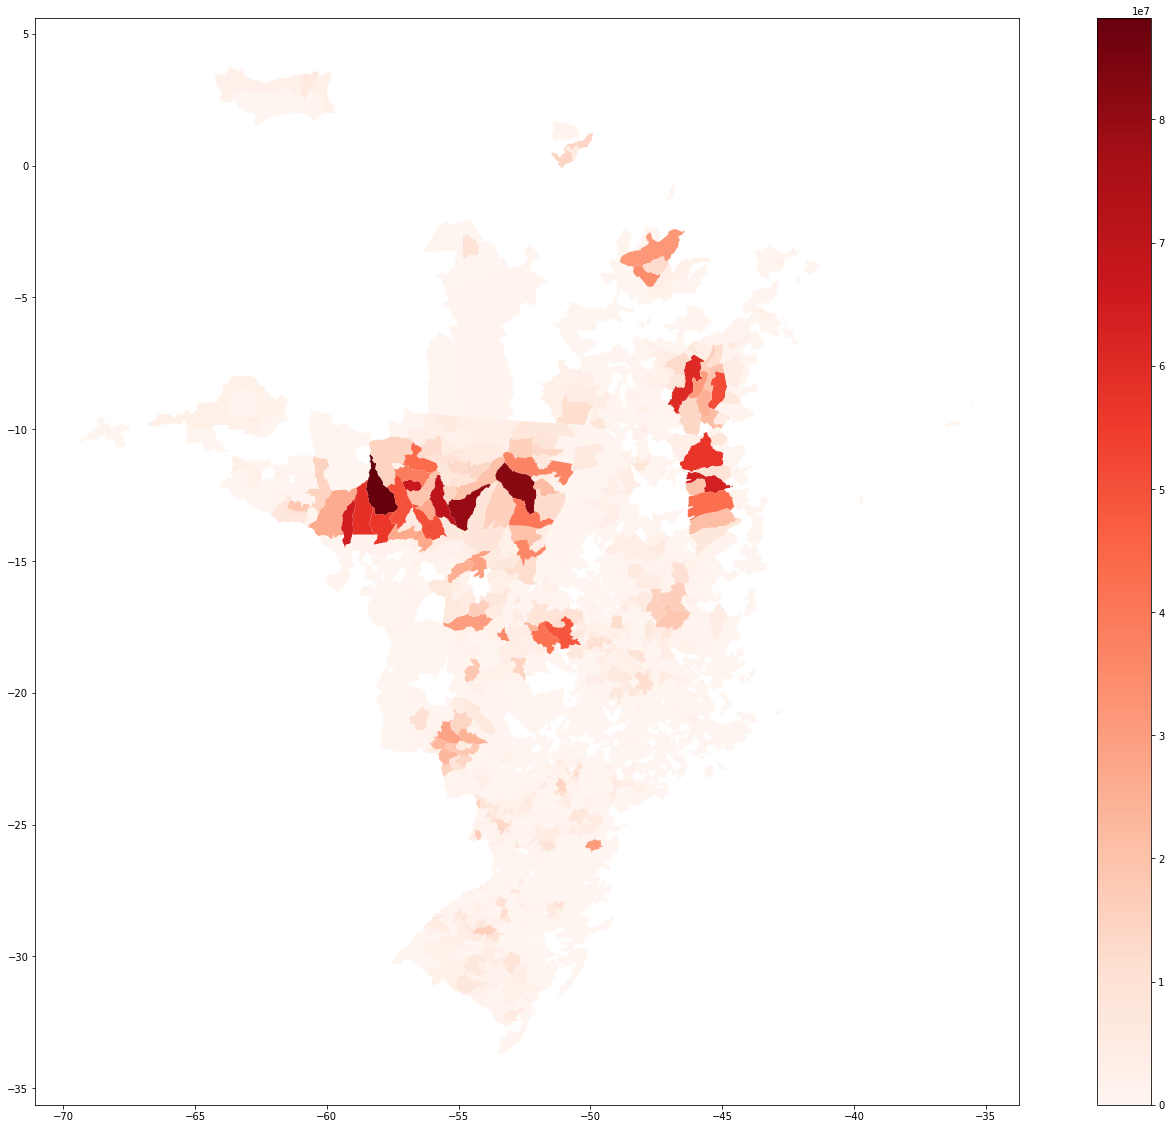

In [15]:
values = ['BEEF_EQUIVALENT_TONNES', 'BEEF_FOB_USD', 'SOY_EQUIVALENT_TONNES', 'SOY_FOB_USD']
title = ['Toneladas de carne exportada', 'Exportação de carne (dólares)', 'Toneladas de soja exportada', 'Exportação de soja (dólares)']

for variable, title in zip(values, title):
    mean = df_basic[variable].mean()
    df_agro = get_df_variable(df_grouped, variable)
    display(df_agro)
    show_chart(df_agro, title, mean) 
    df_geo_merged.plot(column=variable, cmap = 'Reds', figsize=(28, 20), legend=True)
    
